keras retina tf115 version  
setup 잘 됐는지 확인 위해 관련 모듈 import

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time
%matplotlib inline

In [2]:
# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.utils.gpu import setup_gpu

Using TensorFlow backend.


In [ ]:
keras.backend.tensorflow_backend._get_available_gpus()

In [ ]:
# import tensorflow as tf
 
# # to solve this error: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize 
 
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#       # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

In [ ]:
# there are setup_gpu issues
# gpu = 0
# setup_gpu(gpu)

In [ ]:
#!pwd
#%cd D:\jupyter_dir\DLCV\Detection\retinanet\keras_retinanet
#!mkdir snapshots
#%cd snapshots
# !wget https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

In [3]:
model_path = 'D:/jupyter_dir/DLCV/Detection/retinanet/keras_retinanet/snapshots/resnet50_coco_best_v2.1.0.h5'
print(model_path)

D:/jupyter_dir/DLCV/Detection/retinanet/keras_retinanet/snapshots/resnet50_coco_best_v2.1.0.h5


In [4]:
# it takes some time to load model
retina_model = models.load_model(model_path, backbone_name = 'resnet50')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


D:\Anaconda3\envs\tf115\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


#### COCO dataset의 class id별 class명 dict

In [5]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [6]:
test_array = np.array([[1, 2]])
print(test_array.shape)
expanded_array = np.expand_dims(test_array, axis=0)
print(expanded_array.shape)
expanded_array = np.expand_dims(test_array, axis=2)
print(expanded_array.shape)

(1, 2)
(1, 1, 2)
(1, 2, 1)


#### image object detection

In [7]:
image = read_image_bgr('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
print('image shape:', image.shape)

draw_img = image.copy()
draw_img = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

image = preprocess_image(image)
image, scale = resize_image(image)
print('resize image size:', image.shape, 'scale:', scale)

start = time.time()
boxes, scores, labels = retina_model.predict_on_batch(np.expand_dims(image, axis=0))
print('(boxes, scores, labels):',boxes, scores, labels)
print('shapes:', boxes.shape, scores.shape, labels.shape)

print('processing time:',time.time()-start)
# it takes long time at first

image shape: (633, 806, 3)
resize image size: (800, 1019, 3) scale: 1.263823064770932

(boxes, scores, labels): [[[288.99298 331.28143 473.5295  693.3066 ]
  [705.7134  327.64816 911.7136  717.19366]
  [ 63.03588 321.96814 251.0367  712.4599 ]
  ...
  [756.04645 293.42343 833.91394 343.33734]
  [778.0924  386.0398  852.2209  543.89215]
  [728.1558  650.9566  965.4205  799.9509 ]]] [[0.93746245 0.9180177  0.91297746 0.867103   0.8343551  0.74052507
  0.7020726  0.68045795 0.6427072  0.61019975 0.5163518  0.50301343
  0.49547184 0.41697666 0.40923718 0.38832307 0.35341105 0.3117882
  0.26910213 0.265585   0.24530274 0.23941717 0.23485652 0.21126458
  0.20996341 0.20989564 0.20856449 0.20393461 0.20235601 0.19603705
  0.19267851 0.1881764  0.18702903 0.18460205 0.17935511 0.1755482
  0.16885048 0.16787466 0.15970314 0.15503609 0.15186152 0.14974192
  0.14693376 0.14424032 0.14410898 0.14259216 0.14112648 0.13672367
  0.13471577 0.13354623 0.13321167 0.1330593  0.13251972 0.13229918
  0.13

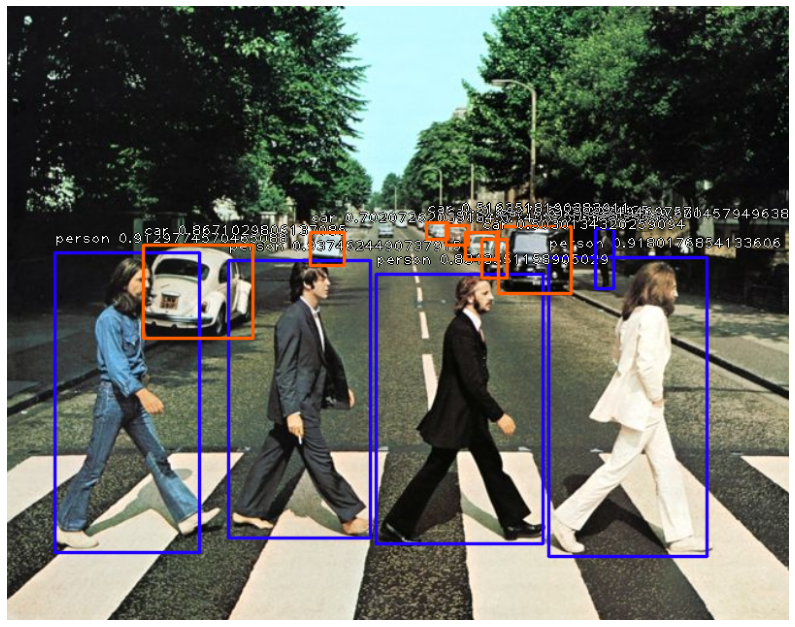

In [8]:
# correct for image scale
boxes /= scale

for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score < 0.5:
        break
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw_img, b, color=color)
    
    caption = f'{labels_to_names_seq[label]} {score}'
    draw_caption(draw_img, b, caption)
    
plt.figure(figsize=(14, 14))
plt.axis('off')
plt.imshow(draw_img)
plt.show()

## image detection function

In [9]:
def get_detected_image_retina(model, img_array, use_copied_array, is_print=True):
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
        
    img_array = preprocess_image(img_array)
    img_array, scale = resize_image(img_array)
    
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(img_array, axis=0))
    
    if is_print:
        print('object detection time:', time.time()-start, 'sec')
        
    boxes /= scale
    
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted 
        if score < 0.5:
            break
        color = label_color(label)
        
        b = box.astype(int)
        draw_box(draw_img, b, color=color)
        
        caption = f"{labels_to_names_seq[label]} {round(score, 2)}"
        draw_caption(draw_img, b, caption)
        
    if is_print:
        print('image processing time:', time.time()-start)
        
    return draw_img

object detection time: 14.368152141571045 sec
image processing time: 14.37315845489502


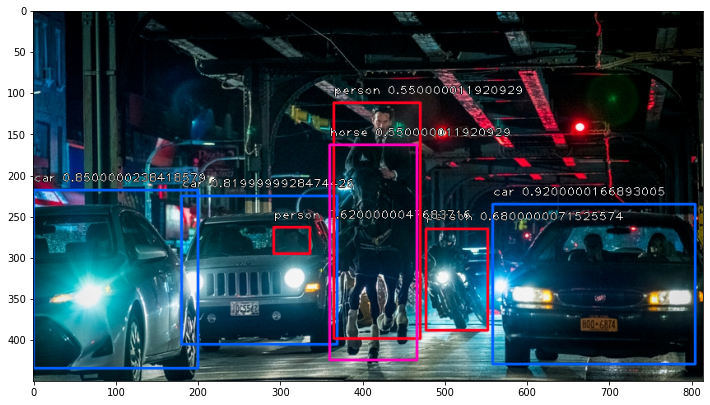

In [10]:
img = cv2.imread('D:/jupyter_dir/DLCV/data/image/john_wick01.jpg')
detected_img = get_detected_image_retina(retina_model, img, use_copied_array=True, is_print=True)
img_rgb = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB) 
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

## Video detection function

In [11]:
def detection_video_retina(model, input_path, output_path=""):
    start = time.time()
    cap = cv2.VideoCapture(input_path)
    codec = cv2.VideoWriter_fourcc(*'XVID')
    
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    vid_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    
    frame_cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    
    print('Total frame:', frame_cnt, 'FPS:', vid_fps)
    
    index = 0
    while True:
        hasFrame, frame = cap.read()
        if not hasFrame:
            print('No More Frame or error')
            break
        index += 1
        print(index, 'frame')
        detected_frame = get_detected_image_retina(model, frame, use_copied_array=False, is_print=True)
        vid_writer.write(detected_frame)
        
    vid_writer.release()
    cap.release()
    print('### total detection time:', round(time.time()-start, 5), '###')

In [13]:
detection_video_retina(retina_model, 'D:/jupyter_dir/DLCV/data/video/football04_fps100.mp4', 'D:/jupyter_dir/DLCV/data/output/football04_retinanet_coco.avi')

Total frame: 2699.0
1 frame
object detection time: 1.5958974361419678 sec
image processing time: 1.5978951454162598
2 frame
object detection time: 1.3139991760253906 sec
image processing time: 1.3149967193603516
3 frame
object detection time: 1.3134422302246094 sec
image processing time: 1.3154466152191162
4 frame
object detection time: 1.308424949645996 sec
image processing time: 1.310425043106079
5 frame
object detection time: 1.307999610900879 sec
image processing time: 1.308997631072998
6 frame
object detection time: 1.3128643035888672 sec
image processing time: 1.3148648738861084
7 frame
object detection time: 1.3229985237121582 sec
image processing time: 1.3259963989257812
8 frame
object detection time: 1.3160014152526855 sec
image processing time: 1.31805419921875
9 frame
object detection time: 1.3100013732910156 sec
image processing time: 1.3120019435882568
10 frame
object detection time: 1.3128466606140137 sec
image processing time: 1.3178534507751465
11 frame
object detection

object detection time: 1.3182659149169922 sec
image processing time: 1.3202641010284424
87 frame
object detection time: 1.3140032291412354 sec
image processing time: 1.3160021305084229
88 frame
object detection time: 1.3259990215301514 sec
image processing time: 1.3280360698699951
89 frame
object detection time: 1.318950891494751 sec
image processing time: 1.3219513893127441
90 frame
object detection time: 1.327049732208252 sec
image processing time: 1.3300480842590332
91 frame
object detection time: 1.319272518157959 sec
image processing time: 1.3222694396972656
92 frame
object detection time: 1.3200273513793945 sec
image processing time: 1.3220667839050293
93 frame
object detection time: 1.3260016441345215 sec
image processing time: 1.3290002346038818
94 frame
object detection time: 1.3250017166137695 sec
image processing time: 1.328005075454712
95 frame
object detection time: 1.3299975395202637 sec
image processing time: 1.3350739479064941
96 frame
object detection time: 1.316998243

object detection time: 1.291532039642334 sec
image processing time: 1.2925355434417725
172 frame
object detection time: 1.2860002517700195 sec
image processing time: 1.2870028018951416
173 frame
object detection time: 1.2890007495880127 sec
image processing time: 1.2910001277923584
174 frame
object detection time: 1.2870008945465088 sec
image processing time: 1.2880027294158936
175 frame
object detection time: 1.2889997959136963 sec
image processing time: 1.291001558303833
176 frame
object detection time: 1.2948553562164307 sec
image processing time: 1.2968928813934326
177 frame
object detection time: 1.2899999618530273 sec
image processing time: 1.2919981479644775
178 frame
object detection time: 1.2830541133880615 sec
image processing time: 1.2850992679595947
179 frame
object detection time: 1.2810001373291016 sec
image processing time: 1.283041000366211
180 frame
object detection time: 1.2856063842773438 sec
image processing time: 1.2866065502166748
181 frame
object detection time: 

object detection time: 1.2866671085357666 sec
image processing time: 1.2887094020843506
256 frame
object detection time: 1.2930021286010742 sec
image processing time: 1.2950434684753418
257 frame
object detection time: 1.2866547107696533 sec
image processing time: 1.2886571884155273
258 frame
object detection time: 1.2810049057006836 sec
image processing time: 1.283003807067871
259 frame
object detection time: 1.2860009670257568 sec
image processing time: 1.2880043983459473
260 frame
object detection time: 1.285081148147583 sec
image processing time: 1.2881190776824951
261 frame
object detection time: 1.2841722965240479 sec
image processing time: 1.2871737480163574
262 frame
object detection time: 1.2820019721984863 sec
image processing time: 1.285003423690796
263 frame
object detection time: 1.2799997329711914 sec
image processing time: 1.2820370197296143
264 frame
object detection time: 1.2900030612945557 sec
image processing time: 1.2920396327972412
265 frame
object detection time: 

object detection time: 1.2839984893798828 sec
image processing time: 1.2870378494262695
340 frame
object detection time: 1.2810032367706299 sec
image processing time: 1.2840001583099365
341 frame
object detection time: 1.2829999923706055 sec
image processing time: 1.286001205444336
342 frame
object detection time: 1.2838778495788574 sec
image processing time: 1.2858786582946777
343 frame
object detection time: 1.2784185409545898 sec
image processing time: 1.280454397201538
344 frame
object detection time: 1.2760040760040283 sec
image processing time: 1.2780020236968994
345 frame
object detection time: 1.2789762020111084 sec
image processing time: 1.2810161113739014
346 frame
object detection time: 1.2810454368591309 sec
image processing time: 1.2840454578399658
347 frame
object detection time: 1.2860004901885986 sec
image processing time: 1.2890048027038574
348 frame
object detection time: 1.285001277923584 sec
image processing time: 1.2879998683929443
349 frame
object detection time: 

object detection time: 1.2909998893737793 sec
image processing time: 1.2929956912994385
425 frame
object detection time: 1.2880005836486816 sec
image processing time: 1.289999008178711
426 frame
object detection time: 1.2826814651489258 sec
image processing time: 1.2856814861297607
427 frame
object detection time: 1.2990005016326904 sec
image processing time: 1.300999641418457
428 frame
object detection time: 1.284998893737793 sec
image processing time: 1.2879979610443115
429 frame
object detection time: 1.2837955951690674 sec
image processing time: 1.286794900894165
430 frame
object detection time: 1.2831580638885498 sec
image processing time: 1.2851595878601074
431 frame
object detection time: 1.2801682949066162 sec
image processing time: 1.283167839050293
432 frame
object detection time: 1.2861225605010986 sec
image processing time: 1.2891216278076172
433 frame
object detection time: 1.2850005626678467 sec
image processing time: 1.2870020866394043
434 frame
object detection time: 1.

object detection time: 1.2830018997192383 sec
image processing time: 1.2850008010864258
509 frame
object detection time: 1.2839727401733398 sec
image processing time: 1.2859723567962646
510 frame
object detection time: 1.2860209941864014 sec
image processing time: 1.2880592346191406
511 frame
object detection time: 1.2795109748840332 sec
image processing time: 1.281508207321167
512 frame
object detection time: 1.2834758758544922 sec
image processing time: 1.285475730895996
513 frame
object detection time: 1.281001329421997 sec
image processing time: 1.2839982509613037
514 frame
object detection time: 1.288001298904419 sec
image processing time: 1.2910008430480957
515 frame
object detection time: 1.2860002517700195 sec
image processing time: 1.2880566120147705
516 frame
object detection time: 1.2809991836547852 sec
image processing time: 1.281999111175537
517 frame
object detection time: 1.2840044498443604 sec
image processing time: 1.285001277923584
518 frame
object detection time: 1.2

object detection time: 1.2869994640350342 sec
image processing time: 1.288041353225708
593 frame
object detection time: 1.2788498401641846 sec
image processing time: 1.280848503112793
594 frame
object detection time: 1.2809994220733643 sec
image processing time: 1.2830398082733154
595 frame
object detection time: 1.2780022621154785 sec
image processing time: 1.2800378799438477
596 frame
object detection time: 1.2829632759094238 sec
image processing time: 1.2849628925323486
597 frame
object detection time: 1.2910058498382568 sec
image processing time: 1.2930011749267578
598 frame
object detection time: 1.2826793193817139 sec
image processing time: 1.2847213745117188
599 frame
object detection time: 1.283001184463501 sec
image processing time: 1.2840032577514648
600 frame
object detection time: 1.281001091003418 sec
image processing time: 1.2830016613006592
601 frame
object detection time: 1.2850048542022705 sec
image processing time: 1.285999059677124
602 frame
object detection time: 1.

object detection time: 1.2790002822875977 sec
image processing time: 1.2810401916503906
678 frame
object detection time: 1.2900035381317139 sec
image processing time: 1.2929999828338623
679 frame
object detection time: 1.2898478507995605 sec
image processing time: 1.2918858528137207
680 frame
object detection time: 1.2884671688079834 sec
image processing time: 1.291466474533081
681 frame
object detection time: 1.2939772605895996 sec
image processing time: 1.2960221767425537
682 frame
object detection time: 1.289884090423584 sec
image processing time: 1.2919399738311768
683 frame
object detection time: 1.288989782333374 sec
image processing time: 1.2910301685333252
684 frame
object detection time: 1.2960009574890137 sec
image processing time: 1.2990002632141113
685 frame
object detection time: 1.2870025634765625 sec
image processing time: 1.2890403270721436
686 frame
object detection time: 1.2929999828338623 sec
image processing time: 1.295039415359497
687 frame
object detection time: 1

object detection time: 1.2950055599212646 sec
image processing time: 1.2980029582977295
763 frame
object detection time: 1.2913963794708252 sec
image processing time: 1.2933974266052246
764 frame
object detection time: 1.2940025329589844 sec
image processing time: 1.2970397472381592
765 frame
object detection time: 1.2937307357788086 sec
image processing time: 1.2957708835601807
766 frame
object detection time: 1.2981305122375488 sec
image processing time: 1.3001739978790283
767 frame
object detection time: 1.3027617931365967 sec
image processing time: 1.3048019409179688
768 frame
object detection time: 1.288001537322998 sec
image processing time: 1.291039228439331
769 frame
object detection time: 1.2903616428375244 sec
image processing time: 1.2934091091156006
770 frame
object detection time: 1.2913246154785156 sec
image processing time: 1.2943251132965088
771 frame
object detection time: 1.2989988327026367 sec
image processing time: 1.3010001182556152
772 frame
object detection time:

object detection time: 1.3083112239837646 sec
image processing time: 1.3103516101837158
847 frame
object detection time: 1.315000057220459 sec
image processing time: 1.3169994354248047
848 frame
object detection time: 1.3099994659423828 sec
image processing time: 1.3110344409942627
849 frame
object detection time: 1.307002067565918 sec
image processing time: 1.3090417385101318
850 frame
object detection time: 1.3080024719238281 sec
image processing time: 1.3110010623931885
851 frame
object detection time: 1.3070015907287598 sec
image processing time: 1.3100006580352783
852 frame
object detection time: 1.3129994869232178 sec
image processing time: 1.3150410652160645
853 frame
object detection time: 1.3230047225952148 sec
image processing time: 1.3250408172607422
854 frame
object detection time: 1.3170013427734375 sec
image processing time: 1.3190419673919678
855 frame
object detection time: 1.320004940032959 sec
image processing time: 1.322040319442749
856 frame
object detection time: 1

object detection time: 1.3410046100616455 sec
image processing time: 1.343003273010254
931 frame
object detection time: 1.3429977893829346 sec
image processing time: 1.344996690750122
932 frame
object detection time: 1.3539988994598389 sec
image processing time: 1.3559997081756592
933 frame
object detection time: 1.3469972610473633 sec
image processing time: 1.348996877670288
934 frame
object detection time: 1.344724178314209 sec
image processing time: 1.3467209339141846
935 frame
object detection time: 1.3500018119812012 sec
image processing time: 1.352041244506836
936 frame
object detection time: 1.3490009307861328 sec
image processing time: 1.3509995937347412
937 frame
object detection time: 1.346132516860962 sec
image processing time: 1.3481881618499756
938 frame
object detection time: 1.344998836517334 sec
image processing time: 1.3469984531402588
939 frame
object detection time: 1.360999584197998 sec
image processing time: 1.3629982471466064
940 frame
object detection time: 1.362

object detection time: 1.3549766540527344 sec
image processing time: 1.35697603225708
1015 frame
object detection time: 1.3529963493347168 sec
image processing time: 1.3549976348876953
1016 frame
object detection time: 1.3559985160827637 sec
image processing time: 1.3579976558685303
1017 frame
object detection time: 1.369002103805542 sec
image processing time: 1.3709986209869385
1018 frame
object detection time: 1.3660006523132324 sec
image processing time: 1.3679993152618408
1019 frame
object detection time: 1.3480026721954346 sec
image processing time: 1.3500008583068848
1020 frame
object detection time: 1.3500003814697266 sec
image processing time: 1.3520007133483887
1021 frame
object detection time: 1.3540029525756836 sec
image processing time: 1.3560435771942139
1022 frame
object detection time: 1.3440027236938477 sec
image processing time: 1.3460004329681396
1023 frame
object detection time: 1.3553378582000732 sec
image processing time: 1.3573362827301025
1024 frame
object detect

object detection time: 1.3509998321533203 sec
image processing time: 1.353999376296997
1099 frame
object detection time: 1.3429968357086182 sec
image processing time: 1.345998764038086
1100 frame
object detection time: 1.343001127243042 sec
image processing time: 1.3450024127960205
1101 frame
object detection time: 1.3400015830993652 sec
image processing time: 1.3419997692108154
1102 frame
object detection time: 1.3512802124023438 sec
image processing time: 1.354313611984253
1103 frame
object detection time: 1.3450000286102295 sec
image processing time: 1.3469994068145752
1104 frame
object detection time: 1.3557636737823486 sec
image processing time: 1.3577616214752197
1105 frame
object detection time: 1.347996711730957 sec
image processing time: 1.3509948253631592
1106 frame
object detection time: 1.3570020198822021 sec
image processing time: 1.3600006103515625
1107 frame
object detection time: 1.3460025787353516 sec
image processing time: 1.3490009307861328
1108 frame
object detectio

object detection time: 1.3540546894073486 sec
image processing time: 1.3570528030395508
1183 frame
object detection time: 1.3610022068023682 sec
image processing time: 1.363999843597412
1184 frame
object detection time: 1.3530008792877197 sec
image processing time: 1.3559978008270264
1185 frame
object detection time: 1.3544578552246094 sec
image processing time: 1.357492208480835
1186 frame
object detection time: 1.3530032634735107 sec
image processing time: 1.3559999465942383
1187 frame
object detection time: 1.360001564025879 sec
image processing time: 1.3630003929138184
1188 frame
object detection time: 1.3490021228790283 sec
image processing time: 1.351999044418335
1189 frame
object detection time: 1.3440003395080566 sec
image processing time: 1.3469994068145752
1190 frame
object detection time: 1.3519995212554932 sec
image processing time: 1.3549978733062744
1191 frame
object detection time: 1.347001075744629 sec
image processing time: 1.3509986400604248
1192 frame
object detectio

object detection time: 1.3579998016357422 sec
image processing time: 1.3599979877471924
1267 frame
object detection time: 1.350585699081421 sec
image processing time: 1.3525843620300293
1268 frame
object detection time: 1.3663811683654785 sec
image processing time: 1.3693792819976807
1269 frame
object detection time: 1.3532466888427734 sec
image processing time: 1.356215238571167
1270 frame
object detection time: 1.347529649734497 sec
image processing time: 1.3515284061431885
1271 frame
object detection time: 1.3539984226226807 sec
image processing time: 1.356997013092041
1272 frame
object detection time: 1.349999189376831 sec
image processing time: 1.3529973030090332
1273 frame
object detection time: 1.3549997806549072 sec
image processing time: 1.3570351600646973
1274 frame
object detection time: 1.3580005168914795 sec
image processing time: 1.3610005378723145
1275 frame
object detection time: 1.3520011901855469 sec
image processing time: 1.3539998531341553
1276 frame
object detectio

object detection time: 1.35184645652771 sec
image processing time: 1.3538477420806885
1351 frame
object detection time: 1.3509950637817383 sec
image processing time: 1.3530354499816895
1352 frame
object detection time: 1.3469362258911133 sec
image processing time: 1.3489351272583008
1353 frame
object detection time: 1.3435325622558594 sec
image processing time: 1.3465721607208252
1354 frame
object detection time: 1.3500823974609375 sec
image processing time: 1.3520822525024414
1355 frame
object detection time: 1.3490564823150635 sec
image processing time: 1.3520944118499756
1356 frame
object detection time: 1.3462114334106445 sec
image processing time: 1.3492112159729004
1357 frame
object detection time: 1.3507285118103027 sec
image processing time: 1.3527679443359375
1358 frame
object detection time: 1.3454241752624512 sec
image processing time: 1.3474233150482178
1359 frame
object detection time: 1.350999116897583 sec
image processing time: 1.3539981842041016
1360 frame
object detect

object detection time: 1.3535683155059814 sec
image processing time: 1.356567144393921
1435 frame
object detection time: 1.3579976558685303 sec
image processing time: 1.3609967231750488
1436 frame
object detection time: 1.3510022163391113 sec
image processing time: 1.3540012836456299
1437 frame
object detection time: 1.3570013046264648 sec
image processing time: 1.3590021133422852
1438 frame
object detection time: 1.350998878479004 sec
image processing time: 1.3539986610412598
1439 frame
object detection time: 1.3510007858276367 sec
image processing time: 1.3529980182647705
1440 frame
object detection time: 1.3529973030090332 sec
image processing time: 1.355997085571289
1441 frame
object detection time: 1.362004280090332 sec
image processing time: 1.3640024662017822
1442 frame
object detection time: 1.355999231338501 sec
image processing time: 1.3579978942871094
1443 frame
object detection time: 1.3760263919830322 sec
image processing time: 1.3780648708343506
1444 frame
object detectio

object detection time: 1.3640003204345703 sec
image processing time: 1.3660407066345215
1519 frame
object detection time: 1.3690035343170166 sec
image processing time: 1.3720412254333496
1520 frame
object detection time: 1.3650023937225342 sec
image processing time: 1.366999864578247
1521 frame
object detection time: 1.3683276176452637 sec
image processing time: 1.3713264465332031
1522 frame
object detection time: 1.3670015335083008 sec
image processing time: 1.3690383434295654
1523 frame
object detection time: 1.363999843597412 sec
image processing time: 1.3660376071929932
1524 frame
object detection time: 1.3740017414093018 sec
image processing time: 1.375999927520752
1525 frame
object detection time: 1.359999418258667 sec
image processing time: 1.3619987964630127
1526 frame
object detection time: 1.3640005588531494 sec
image processing time: 1.367004632949829
1527 frame
object detection time: 1.3559989929199219 sec
image processing time: 1.3579998016357422
1528 frame
object detectio

object detection time: 1.3230032920837402 sec
image processing time: 1.326000452041626
1603 frame
object detection time: 1.3440487384796143 sec
image processing time: 1.348045825958252
1604 frame
object detection time: 1.3230066299438477 sec
image processing time: 1.3259997367858887
1605 frame
object detection time: 1.3319995403289795 sec
image processing time: 1.3350372314453125
1606 frame
object detection time: 1.3340017795562744 sec
image processing time: 1.3369989395141602
1607 frame
object detection time: 1.3250012397766113 sec
image processing time: 1.3279986381530762
1608 frame
object detection time: 1.3339998722076416 sec
image processing time: 1.3369979858398438
1609 frame
object detection time: 1.3298258781433105 sec
image processing time: 1.3328239917755127
1610 frame
object detection time: 1.326585054397583 sec
image processing time: 1.330582618713379
1611 frame
object detection time: 1.330000400543213 sec
image processing time: 1.3339989185333252
1612 frame
object detectio

object detection time: 1.3309986591339111 sec
image processing time: 1.3419997692108154
1687 frame
object detection time: 1.3365914821624756 sec
image processing time: 1.3365914821624756
1688 frame
object detection time: 1.3375065326690674 sec
image processing time: 1.340505599975586
1689 frame
object detection time: 1.3490002155303955 sec
image processing time: 1.3519997596740723
1690 frame
object detection time: 1.3430027961730957 sec
image processing time: 1.3460426330566406
1691 frame
object detection time: 1.334000825881958 sec
image processing time: 1.3370003700256348
1692 frame
object detection time: 1.341001272201538 sec
image processing time: 1.3439993858337402
1693 frame
object detection time: 1.3420419692993164 sec
image processing time: 1.344040870666504
1694 frame
object detection time: 1.3382372856140137 sec
image processing time: 1.3412344455718994
1695 frame
object detection time: 1.3494391441345215 sec
image processing time: 1.3524351119995117
1696 frame
object detecti

object detection time: 1.3409981727600098 sec
image processing time: 1.3439979553222656
1771 frame
object detection time: 1.3420004844665527 sec
image processing time: 1.345001220703125
1772 frame
object detection time: 1.3470962047576904 sec
image processing time: 1.3500950336456299
1773 frame
object detection time: 1.3420004844665527 sec
image processing time: 1.3450398445129395
1774 frame
object detection time: 1.3420002460479736 sec
image processing time: 1.344001293182373
1775 frame
object detection time: 1.338001012802124 sec
image processing time: 1.3410377502441406
1776 frame
object detection time: 1.33500075340271 sec
image processing time: 1.3380391597747803
1777 frame
object detection time: 1.333841323852539 sec
image processing time: 1.336839199066162
1778 frame
object detection time: 1.3310027122497559 sec
image processing time: 1.3340401649475098
1779 frame
object detection time: 1.3360002040863037 sec
image processing time: 1.3390376567840576
1780 frame
object detection 

object detection time: 1.3329999446868896 sec
image processing time: 1.3370006084442139
1855 frame
object detection time: 1.3400042057037354 sec
image processing time: 1.3460073471069336
1856 frame
object detection time: 1.3259966373443604 sec
image processing time: 1.328995704650879
1857 frame
object detection time: 1.3350014686584473 sec
image processing time: 1.3389999866485596
1858 frame
object detection time: 1.3350019454956055 sec
image processing time: 1.3380026817321777
1859 frame
object detection time: 1.3340003490447998 sec
image processing time: 1.3380002975463867
1860 frame
object detection time: 1.335000991821289 sec
image processing time: 1.339040994644165
1861 frame
object detection time: 1.3400013446807861 sec
image processing time: 1.343998670578003
1862 frame
object detection time: 1.3380014896392822 sec
image processing time: 1.3410005569458008
1863 frame
object detection time: 1.3309986591339111 sec
image processing time: 1.3349974155426025
1864 frame
object detecti

object detection time: 1.3439991474151611 sec
image processing time: 1.3469982147216797
1939 frame
object detection time: 1.3429970741271973 sec
image processing time: 1.345996618270874
1940 frame
object detection time: 1.3460030555725098 sec
image processing time: 1.3490407466888428
1941 frame
object detection time: 1.343000888824463 sec
image processing time: 1.346039056777954
1942 frame
object detection time: 1.333000659942627 sec
image processing time: 1.3360018730163574
1943 frame
object detection time: 1.3349997997283936 sec
image processing time: 1.3380000591278076
1944 frame
object detection time: 1.3370022773742676 sec
image processing time: 1.340043306350708
1945 frame
object detection time: 1.3360011577606201 sec
image processing time: 1.3390398025512695
1946 frame
object detection time: 1.3329997062683105 sec
image processing time: 1.3359999656677246
1947 frame
object detection time: 1.3369965553283691 sec
image processing time: 1.3399977684020996
1948 frame
object detectio

object detection time: 1.2869973182678223 sec
image processing time: 1.2900354862213135
2023 frame
object detection time: 1.2840001583099365 sec
image processing time: 1.2870409488677979
2024 frame
object detection time: 1.2900028228759766 sec
image processing time: 1.2930006980895996
2025 frame
object detection time: 1.2890026569366455 sec
image processing time: 1.2920379638671875
2026 frame
object detection time: 1.2850046157836914 sec
image processing time: 1.2880043983459473
2027 frame
object detection time: 1.2900025844573975 sec
image processing time: 1.2930006980895996
2028 frame
object detection time: 1.2880077362060547 sec
image processing time: 1.2910456657409668
2029 frame
object detection time: 1.2970011234283447 sec
image processing time: 1.3000431060791016
2030 frame
object detection time: 1.2850027084350586 sec
image processing time: 1.2880382537841797
2031 frame
object detection time: 1.2940647602081299 sec
image processing time: 1.2970654964447021
2032 frame
object det

object detection time: 1.2780017852783203 sec
image processing time: 1.2820029258728027
2107 frame
object detection time: 1.2829985618591309 sec
image processing time: 1.2860002517700195
2108 frame
object detection time: 1.2770016193389893 sec
image processing time: 1.2800030708312988
2109 frame
object detection time: 1.2880032062530518 sec
image processing time: 1.291001796722412
2110 frame
object detection time: 1.2809994220733643 sec
image processing time: 1.2840001583099365
2111 frame
object detection time: 1.283005714416504 sec
image processing time: 1.2860019207000732
2112 frame
object detection time: 1.2850019931793213 sec
image processing time: 1.2880432605743408
2113 frame
object detection time: 1.2790002822875977 sec
image processing time: 1.2820000648498535
2114 frame
object detection time: 1.2810029983520508 sec
image processing time: 1.2840018272399902
2115 frame
object detection time: 1.277998924255371 sec
image processing time: 1.281001329421997
2116 frame
object detecti

object detection time: 1.2879979610443115 sec
image processing time: 1.2919962406158447
2191 frame
object detection time: 1.2960071563720703 sec
image processing time: 1.2990434169769287
2192 frame
object detection time: 1.2849998474121094 sec
image processing time: 1.2889988422393799
2193 frame
object detection time: 1.2860002517700195 sec
image processing time: 1.2900371551513672
2194 frame
object detection time: 1.289001226425171 sec
image processing time: 1.2920446395874023
2195 frame
object detection time: 1.2810032367706299 sec
image processing time: 1.2850399017333984
2196 frame
object detection time: 1.2940001487731934 sec
image processing time: 1.2980413436889648
2197 frame
object detection time: 1.2810006141662598 sec
image processing time: 1.284999132156372
2198 frame
object detection time: 1.2830030918121338 sec
image processing time: 1.2870004177093506
2199 frame
object detection time: 1.2810022830963135 sec
image processing time: 1.285038709640503
2200 frame
object detect

object detection time: 1.2809994220733643 sec
image processing time: 1.2840359210968018
2275 frame
object detection time: 1.2790005207061768 sec
image processing time: 1.2810001373291016
2276 frame
object detection time: 1.2810008525848389 sec
image processing time: 1.2830402851104736
2277 frame
object detection time: 1.2829995155334473 sec
image processing time: 1.2849998474121094
2278 frame
object detection time: 1.2840938568115234 sec
image processing time: 1.2860922813415527
2279 frame
object detection time: 1.2840063571929932 sec
image processing time: 1.2860000133514404
2280 frame
object detection time: 1.2780001163482666 sec
image processing time: 1.2810001373291016
2281 frame
object detection time: 1.2839999198913574 sec
image processing time: 1.2860403060913086
2282 frame
object detection time: 1.2799997329711914 sec
image processing time: 1.2820372581481934
2283 frame
object detection time: 1.2819993495941162 sec
image processing time: 1.2850360870361328
2284 frame
object det

object detection time: 1.2820000648498535 sec
image processing time: 1.2839996814727783
2359 frame
object detection time: 1.2800002098083496 sec
image processing time: 1.2820379734039307
2360 frame
object detection time: 1.286998987197876 sec
image processing time: 1.2890369892120361
2361 frame
object detection time: 1.2830016613006592 sec
image processing time: 1.2850403785705566
2362 frame
object detection time: 1.283001184463501 sec
image processing time: 1.2850010395050049
2363 frame
object detection time: 1.2829997539520264 sec
image processing time: 1.2849974632263184
2364 frame
object detection time: 1.2809996604919434 sec
image processing time: 1.282999038696289
2365 frame
object detection time: 1.2809982299804688 sec
image processing time: 1.2829968929290771
2366 frame
object detection time: 1.283996820449829 sec
image processing time: 1.2860355377197266
2367 frame
object detection time: 1.2800023555755615 sec
image processing time: 1.2820014953613281
2368 frame
object detecti

object detection time: 1.2860045433044434 sec
image processing time: 1.28800368309021
2443 frame
object detection time: 1.2880022525787354 sec
image processing time: 1.2900404930114746
2444 frame
object detection time: 1.2860000133514404 sec
image processing time: 1.2880008220672607
2445 frame
object detection time: 1.2840027809143066 sec
image processing time: 1.2860002517700195
2446 frame
object detection time: 1.2930026054382324 sec
image processing time: 1.2950408458709717
2447 frame
object detection time: 1.287998914718628 sec
image processing time: 1.2900381088256836
2448 frame
object detection time: 1.2840023040771484 sec
image processing time: 1.286036729812622
2449 frame
object detection time: 1.2849986553192139 sec
image processing time: 1.2869982719421387
2450 frame
object detection time: 1.2820043563842773 sec
image processing time: 1.2840402126312256
2451 frame
object detection time: 1.2850000858306885 sec
image processing time: 1.2870399951934814
2452 frame
object detecti

object detection time: 1.2790000438690186 sec
image processing time: 1.2810356616973877
2527 frame
object detection time: 1.2820031642913818 sec
image processing time: 1.2840375900268555
2528 frame
object detection time: 1.2779974937438965 sec
image processing time: 1.2799999713897705
2529 frame
object detection time: 1.2808499336242676 sec
image processing time: 1.283888578414917
2530 frame
object detection time: 1.2839994430541992 sec
image processing time: 1.2860407829284668
2531 frame
object detection time: 1.281006097793579 sec
image processing time: 1.2830400466918945
2532 frame
object detection time: 1.2800023555755615 sec
image processing time: 1.28304123878479
2533 frame
object detection time: 1.282001256942749 sec
image processing time: 1.2850391864776611
2534 frame
object detection time: 1.2765166759490967 sec
image processing time: 1.2785160541534424
2535 frame
object detection time: 1.2790007591247559 sec
image processing time: 1.281999111175537
2536 frame
object detection

object detection time: 1.2789978981018066 sec
image processing time: 1.2809979915618896
2611 frame
object detection time: 1.2909986972808838 sec
image processing time: 1.2939980030059814
2612 frame
object detection time: 1.2780044078826904 sec
image processing time: 1.2800405025482178
2613 frame
object detection time: 1.279001235961914 sec
image processing time: 1.281038761138916
2614 frame
object detection time: 1.2770030498504639 sec
image processing time: 1.2790448665618896
2615 frame
object detection time: 1.2820050716400146 sec
image processing time: 1.2840428352355957
2616 frame
object detection time: 1.2790017127990723 sec
image processing time: 1.2809994220733643
2617 frame
object detection time: 1.281001091003418 sec
image processing time: 1.2839970588684082
2618 frame
object detection time: 1.2819998264312744 sec
image processing time: 1.2840375900268555
2619 frame
object detection time: 1.281001091003418 sec
image processing time: 1.2839996814727783
2620 frame
object detecti

object detection time: 1.2802066802978516 sec
image processing time: 1.283247470855713
2695 frame
object detection time: 1.2870001792907715 sec
image processing time: 1.2889997959136963
2696 frame
object detection time: 1.2790000438690186 sec
image processing time: 1.2810370922088623
2697 frame
object detection time: 1.2820029258728027 sec
image processing time: 1.2839999198913574
2698 frame
object detection time: 1.2830009460449219 sec
image processing time: 1.2850372791290283
2699 frame
object detection time: 1.2799980640411377 sec
image processing time: 1.2829968929290771
No More Frame or error
### total detection time: 3588.95522 ###
